In [1]:
# modules
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data_semi_train.csv")

In [3]:
df.shape

(11491, 591)

In [4]:
df.head()

,Label,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,normal,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,100.0,101.4519,0.1211,1.5088,...,NaN,NaN,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557
1,normal,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,100.0,102.7180,0.1217,1.4794,...,NaN,NaN,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478
2,normal,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,100.0,104.8891,0.1280,1.3588,...,NaN,NaN,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891
3,normal,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,100.0,92.2493,0.1256,1.4360,...,0.0005,NaN,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087
4,normal,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,100.0,101.0354,0.1260,1.5015,...,0.0029,NaN,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529


In [5]:
df.tail()

,Label,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
11486,normal,3024.2073,2424.2201,2240.4024,1566.7072,-2.6379,100.0,100.3331,0.1203,1.3916,...,NaN,NaN,0.4986,0.0235,0.0057,4.7449,-0.0031,0.0269,0.0081,442.7744
11487,normal,2949.6321,2510.9854,2181.3872,1297.5681,-2.7171,100.0,115.1750,0.1265,1.4105,...,NaN,247.1294,0.4992,0.0109,0.0026,2.2044,0.0321,0.0229,0.0084,139.2623
11488,normal,3038.8449,2456.6541,2190.1101,825.8933,-3.1172,100.0,114.8281,0.1217,1.4689,...,0.0033,142.2710,0.5025,0.0218,0.0049,4.2675,0.0313,0.0167,0.0053,74.2087
11489,normal,2993.0400,2504.6600,2229.3333,1553.3158,1.5123,100.0,102.7800,0.1235,1.4479,...,0.0038,80.4663,0.4984,0.0161,0.0039,3.2251,0.0140,0.0112,0.0038,80.4663
11490,normal,3108.1682,2269.4657,2199.5594,1489.7562,-2.0973,100.0,100.1003,0.1222,1.5727,...,0.0042,90.7147,0.4968,0.0122,0.0028,2.4340,0.0175,0.0163,0.0053,83.3342


In [6]:
df.Label.value_counts()

normal    10751
defect      740
Name: Label, dtype: int64

In [7]:
df.describe()

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
count,11449.000000,11434.000000,11381.000000,11391.000000,11381.000000,11392.0,11381.000000,11419.000000,11476.000000,11473.000000,...,4548.000000,4470.000000,11482.000000,11487.000000,11484.000000,11484.000000,11483.000000,11480.000000,11486.00000,11485.000000
mean,3014.536549,2496.012299,2200.423984,1395.618317,4.378355,100.0,101.149555,0.121752,1.463317,-0.000814,...,0.005381,98.862766,0.500075,0.015144,0.003810,3.032620,0.021435,0.016405,0.00526,99.727847
std,73.986159,80.756122,29.337407,443.624918,57.263561,0.0,6.273182,0.009142,0.074339,0.015155,...,0.003026,88.888180,0.003381,0.015974,0.003454,3.324925,0.012366,0.008746,0.00285,94.767225
min,2743.240000,2162.870000,2060.660000,0.000000,-3.589900,100.0,72.388200,0.000000,1.158800,-0.050400,...,-0.001700,-52.443200,0.485300,0.001000,0.001000,0.153600,-0.021300,-0.006300,-0.00200,-77.402500
25%,2964.852100,2446.607350,2181.844900,1082.444400,-2.877600,100.0,97.207300,0.121800,1.413000,-0.011000,...,0.003500,46.980375,0.497900,0.010500,0.002900,2.107600,0.013200,0.010300,0.00330,33.109000
50%,3012.049100,2496.437850,2201.045900,1328.116000,-2.374000,100.0,101.328800,0.123100,1.463400,-0.001200,...,0.004600,70.585550,0.500100,0.013300,0.003400,2.645300,0.020600,0.015300,0.00490,78.462700
75%,3060.972500,2546.770425,2219.541700,1636.805550,-1.790400,100.0,105.097700,0.124500,1.514000,0.008800,...,0.006600,120.410400,0.502300,0.016600,0.004100,3.315400,0.028250,0.021200,0.00680,144.966500
max,3356.350000,2872.557000,2315.266700,3715.041700,1112.472800,100.0,129.252200,0.130000,1.719800,0.070700,...,0.028600,817.456300,0.512800,0.233900,0.051300,48.684900,0.102800,0.079900,0.02860,737.304800


array([[<AxesSubplot:title={'center':'v001'}>]], dtype=object)

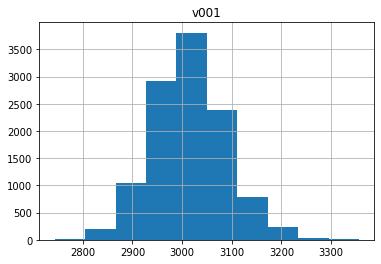

In [8]:
df.hist('v001')

<AxesSubplot:>

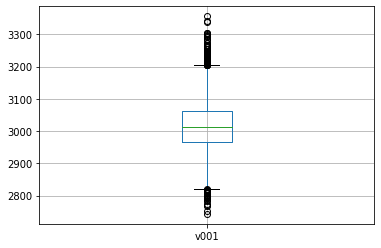

In [9]:
df.boxplot('v001')

array([[<AxesSubplot:title={'center':'v104'}>]], dtype=object)

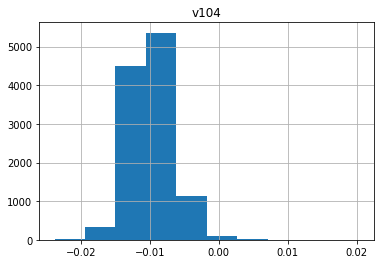

In [10]:
var_name = 'v104'
df.hist(var_name)

<AxesSubplot:>

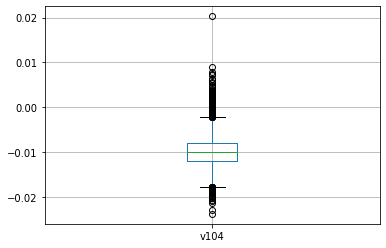

In [11]:
df.boxplot(var_name)

<AxesSubplot:title={'center':'v104'}, xlabel='Label'>

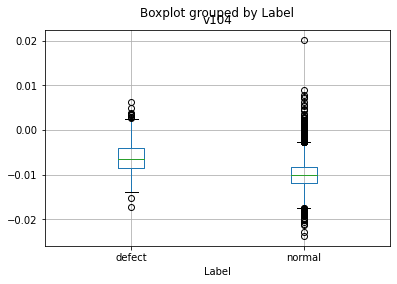

In [12]:
df.boxplot('v104',by='Label')

In [13]:
Label = df['Label']
Data = df.iloc[:,1:]

In [14]:
Label

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
11486    normal
11487    normal
11488    normal
11489    normal
11490    normal
Name: Label, Length: 11491, dtype: object

In [15]:
Data

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,100.0,101.4519,0.1211,1.5088,-0.0097,...,NaN,NaN,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557
1,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,100.0,102.7180,0.1217,1.4794,-0.0188,...,NaN,NaN,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478
2,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,100.0,104.8891,0.1280,1.3588,0.0228,...,NaN,NaN,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891
3,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,100.0,92.2493,0.1256,1.4360,-0.0083,...,0.0005,NaN,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087
4,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,100.0,101.0354,0.1260,1.5015,-0.0236,...,0.0029,NaN,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11486,3024.2073,2424.2201,2240.4024,1566.7072,-2.6379,100.0,100.3331,0.1203,1.3916,0.0053,...,NaN,NaN,0.4986,0.0235,0.0057,4.7449,-0.0031,0.0269,0.0081,442.7744
11487,2949.6321,2510.9854,2181.3872,1297.5681,-2.7171,100.0,115.1750,0.1265,1.4105,0.0004,...,NaN,247.1294,0.4992,0.0109,0.0026,2.2044,0.0321,0.0229,0.0084,139.2623
11488,3038.8449,2456.6541,2190.1101,825.8933,-3.1172,100.0,114.8281,0.1217,1.4689,0.0022,...,0.0033,142.2710,0.5025,0.0218,0.0049,4.2675,0.0313,0.0167,0.0053,74.2087
11489,2993.0400,2504.6600,2229.3333,1553.3158,1.5123,100.0,102.7800,0.1235,1.4479,0.0073,...,0.0038,80.4663,0.4984,0.0161,0.0039,3.2251,0.0140,0.0112,0.0038,80.4663


In [16]:
x = np.array([1, 2, np.nan, 3])

In [17]:
x

array([ 1.,  2., nan,  3.])

In [18]:
np.isnan(x)

array([False, False,  True, False])

In [19]:
na_mat = np.isnan(Data)

In [20]:
na_mat

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11486,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
11487,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
11488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
na_mat.sum(axis=0)

v001     42
v002     57
v003    110
v004    100
v005    110
       ... 
v586      7
v587      8
v588     11
v589      5
v590      6
Length: 590, dtype: int64

In [22]:
len(na_mat.sum(axis=0))

590

In [27]:
na_mat.sum(axis=1)

0        29
1        30
2        32
3        28
4        27
         ..
11486    30
11487    18
11488    25
11489    24
11490    25
Length: 11491, dtype: int64

In [30]:
na_mat.sum().sum()/11491/591

0.04520715910826114

In [23]:
df.shape

(11491, 591)

In [25]:
len(df.columns)

591

In [31]:
x = Data.v001

In [32]:
x

0        2872.0667
1        2925.8098
2        2985.1397
3        3205.5703
4        3065.9593
           ...    
11486    3024.2073
11487    2949.6321
11488    3038.8449
11489    2993.0400
11490    3108.1682
Name: v001, Length: 11491, dtype: float64

In [33]:
scipy.stats.skew(x)

nan

In [86]:
x = Data.iloc[:,0]

In [87]:
scipy.stats.skew(x)

nan

In [88]:
np.mean(x)

3014.5365487553386

In [89]:
?scipy.stats.skew

In [95]:
float(scipy.stats.skew(x.values,nan_policy='omit').data)

0.23721365907885203

In [43]:
sp.stats.kurtosis(x,nan_policy='omit')

0.3883747424590567

In [47]:
data_normal = Data[Label=='normal']
data_defect = Data[Label=='defect']

In [48]:
data_normal.shape

(10751, 590)

In [49]:
data_defect.shape

(740, 590)

In [50]:
data_defect

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014,v015,v016,v017,v018,v019,v020,v021,v022,v023,v024,v025,v026,v027,v028,v029,v030,v031,v032,v033,v034,v035,v036,v037,v038,v039,v040,...,v551,v552,v553,v554,v555,v556,v557,v558,v559,v560,v561,v562,v563,v564,v565,v566,v567,v568,v569,v570,v571,v572,v573,v574,v575,v576,v577,v578,v579,v580,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
10,2750.7676,2615.6477,2161.6091,622.3822,-2.6160,100.0,101.6249,0.1223,1.5454,-0.0130,0.0097,0.9637,198.0332,0.0,6.9763,419.8002,NaN,0.9654,186.9733,12.4867,1.4207,-5700.3473,2762.6008,-3345.5986,-131.2740,1.2551,2.0075,7.1030,67.2776,2.5791,0.2005,3.7398,84.7155,9.6216,50.2264,63.7552,49.7825,66.2495,87.0497,117.5888,...,NaN,0.1447,0.1022,10.6097,NaN,64.4900,NaN,NaN,0.9259,0.6464,0.1265,68.3753,271.4039,0.6018,8.6728,NaN,3.3485,0.1074,NaN,44.0475,531.5890,2.4277,-14.3583,0.4379,-4.4560,0.1270,-2.7940,17.8976,NaN,NaN,0.0049,NaN,0.5034,0.0170,0.0039,3.3959,0.0137,0.0164,0.0050,199.0432
21,3121.7602,2555.7984,2200.1914,1645.7631,-2.6379,100.0,104.2290,0.1221,1.5837,-0.0167,0.0121,0.9669,198.8891,0.0,5.1853,408.1316,10.0872,0.9702,188.7471,12.6770,1.3959,-4891.0489,2573.9575,-3666.9062,-2522.3384,1.3966,2.0982,8.0968,71.4268,2.1716,0.1743,3.0761,85.3820,8.3351,49.8704,63.5193,50.1355,65.9398,85.9154,117.7794,...,50.2860,13.1201,0.2782,21.8299,5.7449,79.2222,12.6315,18.2730,1.2230,0.2174,0.0686,16.0941,249.4349,NaN,5.1370,0.2112,NaN,0.0783,2.0402,28.2591,539.8239,1.7555,-16.1032,0.0450,-4.0664,0.0213,-3.4278,4.0485,NaN,NaN,NaN,NaN,0.4999,0.0124,0.0025,2.4264,0.0071,0.0317,0.0112,354.0146
46,2889.1740,2514.2553,2195.4109,1434.8249,-2.1147,100.0,98.8178,0.1237,1.5459,-0.0036,0.0127,0.9610,199.9638,0.0,8.6385,410.4963,10.5371,0.9733,189.3229,12.6325,1.3935,-6431.6484,2922.3902,-2928.7617,-1725.6279,1.1218,1.9688,6.2231,65.1945,2.5625,0.1836,4.2144,86.8684,8.9686,50.3007,63.6361,49.7304,66.6972,87.1114,118.3307,...,17.7505,1.3569,NaN,8.8008,0.5365,NaN,4.4031,1.7269,0.9109,0.5550,0.1169,60.1945,253.6188,0.7445,NaN,0.2262,1.2317,0.0870,1.1087,NaN,538.0385,1.5469,-15.5750,0.0589,-4.5966,0.0138,-3.3829,6.1849,NaN,NaN,0.0035,47.9381,0.4909,0.0185,0.0046,3.8265,0.0137,0.0224,0.0065,145.7309
110,3031.4266,2475.9538,2243.5905,1555.7346,-3.1248,100.0,95.6463,0.1213,1.5397,-0.0123,0.0218,0.9747,198.1480,0.0,3.1947,406.4697,9.3819,0.9730,188.8083,12.5240,1.4452,-5154.4842,2535.8514,-3774.7896,-3878.3514,1.3633,2.0641,7.9750,64.4497,2.3773,0.1802,2.9807,84.9776,9.1898,50.4760,63.8571,49.5209,66.4304,87.5583,118.4479,...,16.8728,0.7932,NaN,7.6729,NaN,6.9081,4.1748,1.0498,0.9796,1.1902,0.2271,121.8315,263.5785,NaN,NaN,0.1342,3.3271,0.0602,3.4478,22.7082,533.3826,1.9625,-15.7832,0.1541,-4.3226,0.0573,-3.2987,8.3494,NaN,0.0147,NaN,69.5435,0.5025,0.0224,0.0047,4.4903,0.0210,0.0066,0.0017,48.8608
130,2938.1576,2424.8215,2203.9743,816.4502,-1.9841,100.0,106.8990,0.1231,1.5076,-0.0047,-0.0101,0.9757,202.4983,0.0,8.2510,415.3230,9.8610,0.9745,192.7153,12.5015,1.4132,-6267.6863,2676.8452,-5758.9394,951.6392,1.0023,1.4246,5.5196,65.0525,2.6525,0.2575,3.1358,84.4874,9.3416,50.3310,63.9662,49.6798,65.9628,86.8362,117.4268,...,19.1955,1.0286,0.4634,8.4464,0.4178,90.1922,4.6702,1.2934,0.8970,0.4455,0.0718,49.4330,243.7372,0.7981,9.7177,0.1508,3.9084,0.0598,3.9465,19.7246,532.6542,2.3306,-16.6570,0.4091,-4.7615,0.1168,-3.2306,17.0748,0.0077,NaN,NaN,NaN,0.5031,0.0174,0.0041,3.4552,0.0078,0.0147,0.0052,108.7718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11430,2944.5287,2457.1690,2169.2593,902.1067,-2.3754,100.0,101.1622,0.1213,1.4877,-0.0114,0.0046,0.9493,202.9285,0.0,8.7759,417.8170,10.4010,0.9658,192.6160,12.4733,1.4115,-6068.4060,2723.1399,-4733.6241,-732.5485,1.2729,2.0277,7.1519,64

In [51]:
data_normal

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014,v015,v016,v017,v018,v019,v020,v021,v022,v023,v024,v025,v026,v027,v028,v029,v030,v031,v032,v033,v034,v035,v036,v037,v038,v039,v040,...,v551,v552,v553,v554,v555,v556,v557,v558,v559,v560,v561,v562,v563,v564,v565,v566,v567,v568,v569,v570,v571,v572,v573,v574,v575,v576,v577,v578,v579,v580,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,100.0,101.4519,0.1211,1.5088,-0.0097,-0.0038,0.9645,200.7295,0.0,9.6299,398.6049,10.0973,0.9817,190.5727,12.5429,1.4019,-6081.0415,2678.9761,-6084.1595,-590.8294,1.1865,1.9364,6.2550,70.4056,1.5413,0.1252,4.3020,85.0739,7.8057,50.5627,63.5789,49.4194,66.1919,86.8626,116.6459,...,15.9962,0.9784,-0.0328,7.5080,0.4215,22.2514,NaN,1.3207,0.9594,0.0908,0.0317,10.6813,260.8328,NaN,NaN,0.1807,6.2978,0.0771,NaN,27.5086,533.8588,1.9840,-15.3531,0.2343,-4.8297,0.0794,-3.5013,11.6001,0.0149,NaN,NaN,NaN,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557
1,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,100.0,102.7180,0.1217,1.4794,-0.0188,0.0031,0.9568,200.9935,0.0,9.3448,418.6195,9.8631,0.9615,191.1818,12.5072,1.4190,-3769.3156,1748.8359,-1594.5973,2589.1539,0.5642,1.0679,2.9019,71.7079,2.1961,0.1380,4.6783,84.8941,9.0635,50.3771,63.7512,49.6447,66.6060,86.7475,117.9614,...,17.6448,0.2579,NaN,7.9678,0.0826,117.1721,4.3886,0.3622,0.9494,-0.1103,-0.0184,-10.1869,266.2566,0.7238,6.8414,0.2444,NaN,0.1120,2.5177,NaN,537.7914,2.1399,-18.0346,0.2534,-5.1159,0.1058,-3.2926,11.4859,0.0205,NaN,NaN,NaN,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478
2,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,100.0,104.8891,0.1280,1.3588,0.0228,-0.0053,0.9797,197.3502,0.0,6.4720,407.4988,10.1103,0.9799,187.2681,12.5459,1.4119,-5799.2737,2894.2553,-4789.5484,-2609.6382,1.2584,2.0169,7.2017,72.4389,1.9934,0.1528,3.6938,83.4220,8.4966,50.1463,64.3334,49.8479,65.9400,87.1792,118.5390,...,NaN,1.2265,0.2854,6.2589,0.5234,47.4844,NaN,NaN,0.9953,0.4325,0.0937,41.6989,250.1749,0.5172,8.0295,0.1429,3.4076,0.0613,3.1980,29.2979,537.6087,2.3682,-16.8353,0.2469,-5.0948,0.0709,-3.3805,10.0319,NaN,0.0153,NaN,NaN,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891
3,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,100.0,92.2493,0.1256,1.4360,-0.0083,0.0032,0.9752,200.5003,0.0,10.0622,414.3729,10.0431,0.9765,190.4126,12.5559,1.3885,-5749.9708,3131.3156,-2897.2995,-4342.4543,1.2564,2.0248,7.1149,71.9216,2.7919,0.2188,3.5018,83.9064,8.9791,49.9196,63.4246,50.0767,66.0825,86.3524,121.1162,...,17.5885,1.9743,0.6785,7.0116,NaN,132.4315,4.3915,2.6934,1.0660,0.4289,0.1158,40.3953,255.6273,0.6571,NaN,NaN,5.0189,0.0661,4.9772,22.9840,535.2485,2.0877,-14.7022,0.3144,-4.4944,0.0949,-2.7644,14.8545,NaN,0.0014,0.0005,NaN,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087
4,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,100.0,101.0354,0.1260,1.5015,-0.0236,-0.0029,0.9759,196.1747,0.0,9.6206,400.4567,10.0937,0.9812,186.0887,12.5274,1.4015,-5659.3444,2801.6245,-5929.8463,-1159.8138,1.2661,2.0052,7.1357,68.8554,2.6434,0.1946,3.6528,94.5426,8.0489,54.2682,69.0960,45.7313,66.0721,86.5826,121.3525,...,15.9930,NaN,NaN,7.6449,0.2715,43.4412,4.0829,1.0141,0.9212,-0.0165,-0.0056,-0.6319,260.6697,NaN,4.7240,0.1710,1.9020,NaN,1.7960,33.5511,530.2212,1.8133,-16.6428,0.1656,-5.0506,0.0501,-3.5106,9.6399,NaN,NaN,0.0029,NaN,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11486,3024.2073,2424.2201,2240.4024,1566.7072,-2.6379,100.0,100.3331,0.1203,1.3916,0.0053,-0.0104,0.9524,204.9049,0.0,12.7945,421.5149,10.2822,0.9624,194.6889,12.4455,1.4006,-4672.4145,1952.8708,-3934.8755,1309.3161,0.7351,1.0080,3.9997

In [52]:
x1 = data_normal.iloc[:,0]
x2 = data_defect.iloc[:,0]

In [54]:
r = sp.stats.ttest_ind(x1,x2,nan_policy='omit')

In [55]:
r.statistic

7.115398328071391

In [56]:
r.pvalue

1.1825424927695654e-12

In [58]:
x = Data.v001

(array([  19.,  198., 1049., 2917., 3807., 2390.,  787.,  235.,   38.,
           9.]),
 array([2743.24 , 2804.551, 2865.862, 2927.173, 2988.484, 3049.795,
        3111.106, 3172.417, 3233.728, 3295.039, 3356.35 ]),
 <a list of 10 Patch objects>)

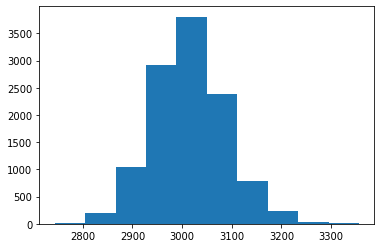

In [59]:
plt.hist(x)

In [60]:
np.mean(x)

3014.5365487553386

In [62]:
np.sqrt(np.var(x))

73.9829282003955

In [63]:
3*74

222

In [64]:
x = Data.iloc[:,0]
m = x.mean()
s = np.sqrt(x.var(ddof=1))

In [65]:
a = np.array([1,2,3])

In [66]:
a

array([1, 2, 3])

In [67]:
a.mean()

2.0

In [68]:
a.var()

0.6666666666666666

In [69]:
a2 = pd.Series(a)

In [70]:
type(a)

numpy.ndarray

In [71]:
type(a2)

pandas.core.series.Series

In [72]:
a2

0    1
1    2
2    3
dtype: int64

In [73]:
a.mean()

2.0

In [74]:
a.var()

0.6666666666666666

In [75]:
a2.mean()

2.0

In [76]:
a2.var()

1.0

In [77]:
?a.var()

In [78]:
a.var(ddof=1)

1.0

In [79]:
lb = m-3*s
ub = m+3*s

In [80]:
lb

2792.578070585934

In [81]:
ub

3236.4950269247433

In [82]:
idx = ( (x<lb) | (x>ub) ) & (~np.isnan(x))

In [83]:
x[idx]

10       2750.7676
183      3302.8771
482      3249.7905
580      2743.2400
611      3253.3599
958      3295.2071
1047     3244.9648
1163     3253.8713
1180     2787.4900
1610     3244.7400
1701     3246.5283
1776     3249.3762
1777     3268.3836
2005     3273.5872
2056     3240.4390
2210     2792.1819
2340     3301.8827
2703     3304.3587
2743     3284.8200
2793     3245.8000
2969     3245.4491
3225     3237.9353
3485     3266.7950
4268     3241.6901
4419     2766.7729
4598     3262.6108
4837     3342.5812
5574     2784.4685
5645     2792.2400
5766     3266.5500
5841     3297.0895
6108     3241.7660
7101     3246.3100
7107     3244.9618
7327     3262.3326
7350     3236.9981
7407     3266.0400
7493     2774.0759
8798     3339.8624
8899     3282.8700
8931     3238.9971
9009     3266.1241
9248     3292.9205
9301     3261.9335
9842     3248.2163
10221    3295.3887
10310    3238.9406
10429    3256.1032
10660    2770.4000
10791    3244.4916
10808    3239.0240
10861    3248.8653
10864    327

In [84]:
idx.sum()

54

In [103]:
# basic statistics
data_normal = Data[Label=='normal']
data_defect = Data[Label=='defect']
s = np.zeros((Data.shape[1],10))
for i in range(Data.shape[1]):
    # overall
    x = Data.iloc[:,i]
    sk = sp.stats.skew(x,nan_policy='omit')
    kr = sp.stats.kurtosis(x,nan_policy='omit')
    na_num = np.isnan(x).sum()
    # according to the class
    x1 = data_normal.iloc[:,i]
    x2 = data_defect.iloc[:,i]
    m1,m2 = x1.mean(), x2.mean()
    v1,v2 = x1.var(ddof=1), x2.var(ddof=1)
    if v1==0 and v2==0:
        t, p = 0,1
    else:
        r = sp.stats.ttest_ind(x1,x2,nan_policy='omit')
        t = r.statistic
        p = r.pvalue
    s[i,] = [m1,m2,v1,v2,m1-m2,t,p,na_num,sk,kr]


In [104]:
s

array([[ 3.01582521e+03,  2.99583346e+03,  5.33057136e+03, ...,
         4.20000000e+01,  2.37213659e-01,  3.88374742e-01],
       [ 2.49613081e+03,  2.49428218e+03,  6.60341696e+03, ...,
         5.70000000e+01, -3.26553699e-02,  6.01569228e-01],
       [ 2.20053161e+03,  2.19885831e+03,  8.57309307e+02, ...,
         1.10000000e+02, -1.87865359e-01,  6.24103524e-01],
       ...,
       [ 1.62278026e-02,  1.89718919e-02,  7.66793927e-05, ...,
         1.10000000e+01,  9.58644896e-01,  2.00086456e+00],
       [ 5.20768587e-03,  6.02219215e-03,  8.17837569e-06, ...,
         5.00000000e+00,  1.02121621e+00,  2.44604808e+00],
       [ 9.96367918e+01,  1.01049989e+02,  9.12533040e+03, ...,
         6.00000000e+00,  1.34604596e+00,  2.52155283e+00]])

In [105]:
stat = pd.DataFrame(s)
stat.columns = ['m1','m2','v1','v2','diff','t','p','na','sk','kr']
stat['var'] = Data.columns
col = stat.columns
col = col[-1:].append(col[:-1])
stat = stat[col]

In [106]:
stat

,var,m1,m2,v1,v2,diff,t,p,na,sk,kr
0,v001,3015.825213,2995.833456,5330.571362,7190.552024,19.991757,7.115398,1.182542e-12,42.0,0.237214,0.388375
1,v002,2496.130809,2494.282179,6603.416963,5330.586101,1.848630,0.599553,5.488162e-01,57.0,-0.032655,0.601569
2,v003,2200.531606,2198.858314,857.309307,908.386250,1.673292,1.492771,1.355248e-01,110.0,-0.187865,0.624104
3,v004,1402.737139,1292.559825,201777.204399,113599.383988,110.177315,6.528343,6.932752e-11,100.0,0.874998,1.232806
4,v005,4.833147,-2.228220,3501.557722,1.439091,7.061367,3.230622,1.238721e-03,110.0,9.297794,95.429120
...,...,...,...,...,...,...,...,...,...,...,...
585,v586,3.020577,3.207725,11.693775,1.739721,-0.187148,-1.480144,1.388622e-01,7.0,11.991645,156.819681
586,v587,0.021412,0.021773,0.000154,0.000132,-0.000361,-0.767699,4.426816e-01,8.0,0.793785,2.241609
587,v588,0.016228,0.018972,0.000077,0.000067,-0.002744,-8.279731,1.371097e-16,11.0,0.958645,2.000865
588,v589,0.005208,0.006022,0.000008,0.000007,-0.000815,-7.533528,5.309224e-14,5.0,1.021216,2.446048


In [107]:

# outlier
lb_list = np.zeros(Data.shape[1])
ub_list = np.zeros(Data.shape[1])
outlier_mat = np.isnan(na_mat)
for i in range(Data.shape[1]):
    x = Data.iloc[:,i]
    m = x.mean()
    s = np.sqrt(x.var(ddof=1))
    lb = m-6*s
    ub = m+6*s
    idx = ( (x<lb) | (x>ub) ) & (~np.isnan(x))
    outlier_mat.iloc[:,i] = idx
    lb_list[i] = lb
    ub_list[i] = ub


In [108]:
outlier_mat

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014,v015,v016,v017,v018,v019,v020,v021,v022,v023,v024,v025,v026,v027,v028,v029,v030,v031,v032,v033,v034,v035,v036,v037,v038,v039,v040,...,v551,v552,v553,v554,v555,v556,v557,v558,v559,v560,v561,v562,v563,v564,v565,v566,v567,v568,v569,v570,v571,v572,v573,v574,v575,v576,v577,v578,v579,v580,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11486,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11487,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [111]:
outlier_mat.sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
11486    0
11487    0
11488    1
11489    0
11490    0
Length: 11491, dtype: int64

In [112]:
stat['lb'] = lb_list
stat['ub'] = ub_list
stat['out'] = outlier_mat.sum(axis=0).values

In [113]:
stat

,var,m1,m2,v1,v2,diff,t,p,na,sk,kr,lb,ub,out
0,v001,3015.825213,2995.833456,5330.571362,7190.552024,19.991757,7.115398,1.182542e-12,42.0,0.237214,0.388375,2570.619592,3458.453505,0
1,v002,2496.130809,2494.282179,6603.416963,5330.586101,1.848630,0.599553,5.488162e-01,57.0,-0.032655,0.601569,2011.475568,2980.549029,0
2,v003,2200.531606,2198.858314,857.309307,908.386250,1.673292,1.492771,1.355248e-01,110.0,-0.187865,0.624104,2024.399543,2376.448425,0
3,v004,1402.737139,1292.559825,201777.204399,113599.383988,110.177315,6.528343,6.932752e-11,100.0,0.874998,1.232806,-1266.131194,4057.367828,0
4,v005,4.833147,-2.228220,3501.557722,1.439091,7.061367,3.230622,1.238721e-03,110.0,9.297794,95.429120,-339.203013,347.959724,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,v586,3.020577,3.207725,11.693775,1.739721,-0.187148,-1.480144,1.388622e-01,7.0,11.991645,156.819681,-16.916933,22.982173,58
586,v587,0.021412,0.021773,0.000154,0.000132,-0.000361,-0.767699,4.426816e-01,8.0,0.793785,2.241609,-0.052761,0.095631,4
587,v588,0.016228,0.018972,0.000077,0.000067,-0.002744,-8.279731,1.371097e-16,11.0,0.958645,2.000865,-0.036071,0.068880,2
588,v589,0.005208,0.006022,0.000008,0.000007,-0.000815,-7.533528,5.309224e-14,5.0,1.021216,2.446048,-0.011839,0.022359,3


In [114]:
stat.to_csv('stat_out.csv',index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff432609750>]],
      dtype=object)

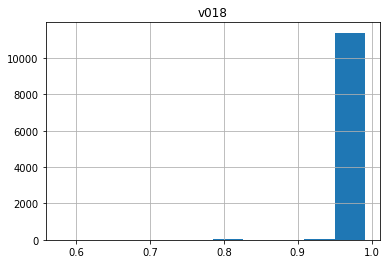

In [115]:
df.hist('v018')

In [116]:
df.v018

0        0.9817
1        0.9615
2        0.9799
3        0.9765
4        0.9812
          ...  
11486    0.9624
11487    0.9767
11488    0.9805
11489    0.9637
11490    0.9687
Name: v018, Length: 11491, dtype: float64

In [117]:
(df.v018<0.96).sum()

588